# Importing Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
%matplotlib inline


# Load dataset

In [123]:
wine=pd.read_csv("winedataset.csv")
wine.head()


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [124]:
for col in wine:
    print(wine[col].value_counts())

2    71
1    59
3    48
Name: Class, dtype: int64
12.37    6
13.05    6
12.08    5
12.29    4
12.00    3
        ..
13.34    1
13.69    1
13.90    1
13.84    1
13.75    1
Name: Alcohol, Length: 126, dtype: int64
1.73    7
1.81    4
1.67    4
1.68    3
1.61    3
       ..
3.45    1
2.51    1
4.61    1
3.83    1
2.68    1
Name: Malic acid, Length: 133, dtype: int64
2.30    7
2.28    7
2.70    6
2.36    6
2.32    6
       ..
2.16    1
2.78    1
2.53    1
1.71    1
1.95    1
Name: Ash, Length: 79, dtype: int64
20.0    15
21.0    11
16.0    11
18.0    10
19.0     9
        ..
19.4     1
11.2     1
21.6     1
18.1     1
14.8     1
Name: Alcalinity of ash, Length: 63, dtype: int64
88     13
86     11
101     9
98      9
96      8
102     7
112     6
94      6
85      6
97      5
80      5
92      5
103     5
89      5
90      4
108     4
107     4
106     4
120     3
118     3
116     3
87      3
100     3
84      3
111     3
110     3
78      3
104     3
95      3
105     2
93      2
113    

In [125]:
wine.isnull().sum() #Check the null values

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

There are no null values

In [126]:
wine.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Class                      AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Alcohol                 AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Malic acid              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Ash                     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Alcalinity of ash       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Magnesium               AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Total phenols           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Flavanoids                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
Nonflavanoid phenols       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Proanthocyanins            AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Color intensity            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Hue                        AxesSubplot(0.578659,0.125;0.0945122x0.343182)
diluted wines              AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Proline                    AxesSubplot

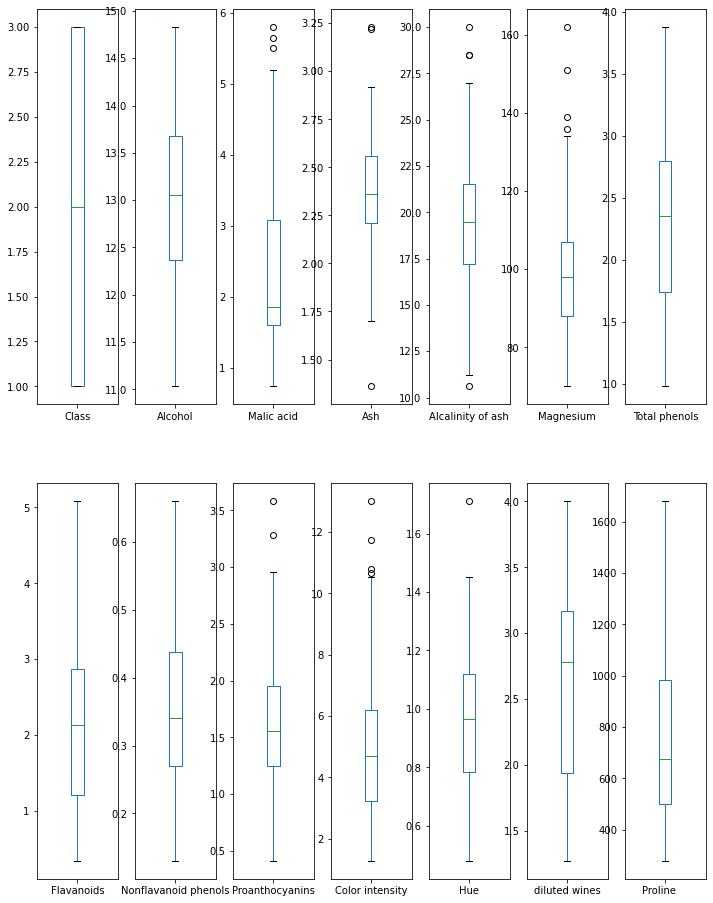

In [127]:
wine.plot(kind='box',subplots=True,layout=(2,7),figsize=(12,16)) #Check the outliers using boxplot

Outliers are present in the following columns : Malic acid, Ash, Alcalinity of ash, Magnesium, Proanthocyanins, Color intensity,Hue  

# Let remove the outliers

# 1. z score

In [128]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(wine))
threshold=3
new_wine=wine[(z<3).all(axis=1)]

Class                      AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Alcohol                 AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Malic acid              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Ash                     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Alcalinity of ash       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Magnesium               AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Total phenols           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Flavanoids                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
Nonflavanoid phenols       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Proanthocyanins            AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Color intensity            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Hue                        AxesSubplot(0.578659,0.125;0.0945122x0.343182)
diluted wines              AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Proline                    AxesSubplot

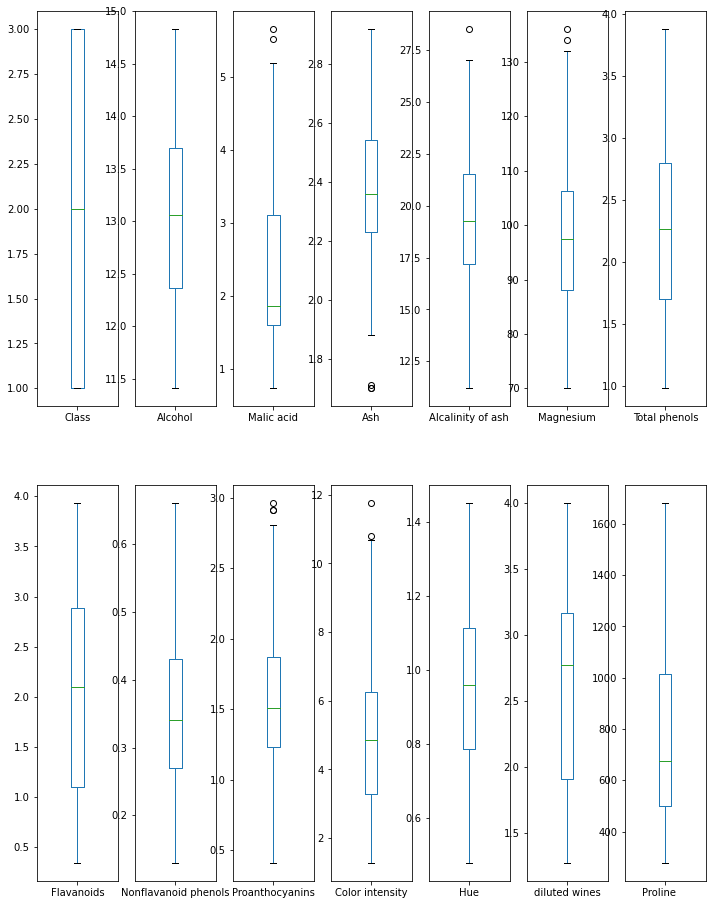

In [129]:
new_wine.plot(kind='box',subplots=True,layout=(2,7),figsize=(12,16))

In [130]:
new_wine.shape

(168, 14)

In [131]:
wine.shape

(178, 14)

In [132]:
# Lose percentage
percentage_loss=((10)/178)*100   
print(percentage_loss)

5.617977528089887


# IQR

In [133]:
q1=new_wine.quantile(0.25)
q3=new_wine.quantile(0.75)
IQR=q3-q1
print(IQR)

Class                     2.0000
Alcohol                   1.3250
Malic acid                1.4950
Ash                       0.3125
Alcalinity of ash         4.3250
Magnesium                18.2500
Total phenols             1.1000
Flavanoids                1.7875
Nonflavanoid phenols      0.1600
Proanthocyanins           0.6350
Color intensity           2.9700
Hue                       0.3250
diluted wines             1.2650
Proline                 514.7500
dtype: float64


In [134]:
wine_new1=wine[~((wine<(q1-1.5*IQR))|(wine>(q3+1.5*IQR))).any(axis=1)]
print(wine_new1.shape)

(155, 14)


In [135]:
# Lose percentage
percentage_loss=((23)/178)*100   
print(percentage_loss)

12.921348314606742


Here, I am lossing more data. So, I will accept z score

# Correlation

In [136]:
new_wine.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.358159,0.466193,-0.041083,0.572880,-0.237956,-0.750019,-0.884289,0.507436,-0.577886,0.255763,-0.648309,-0.802703,-0.644164
Alcohol,-0.358159,1.000000,0.094430,0.208414,-0.355508,0.384287,0.335947,0.299956,-0.182249,0.215285,0.531866,-0.008638,0.111289,0.657493
Malic acid,0.466193,0.094430,1.000000,0.201007,0.322212,0.001273,-0.374547,-0.473367,0.325362,-0.277069,0.287016,-0.568239,-0.407781,-0.185601
Ash,-0.041083,0.208414,0.201007,1.000000,0.357721,0.356159,0.098304,0.025495,0.126694,0.010541,0.220942,-0.069079,-0.052576,0.239357
Alcalinity of ash,0.572880,-0.355508,0.322212,0.357721,1.000000,-0.200760,-0.450440,-0.507554,0.374967,-0.328975,-0.019411,-0.336831,-0.382824,-0.495569
Magnesium,-0.237956,0.384287,0.001273,0.356159,-0.200760,1.000000,0.211757,0.190958,-0.244526,0.127911,0.307082,-0.012432,0.013432,0.427490
Total phenols,-0.750019,0.335947,-0.374547,0.098304,-0.450440,0.211757,1.000000,0.877229,-0.483101,0.632662,-0.062974,0.477061,0.705393,0.526889
Flavanoids,-0.884289,0.299956,-0.473367,0.025495,-0.507554,0.190958,0.877229,1.000000,-0.597009,0.717248,-0.183253,0.601116,0.787549,0.534005
Nonflavanoid phenols,0.507436,-0.182249,0.325362,0.126694,0.374967,-0.244526,-0.483101,-0.597009,1.000000,-0.403707,0.103243,-0.282470,-0.524213,-0.317344
Proanthocyanins,-0.577886,0.215285,-0.277069,0.010541,-0.328975,0.127911,0.632662,0.717248,-0.403707,1.000000,-0.021908,0.344582,0.554727,0.380451


<AxesSubplot:>

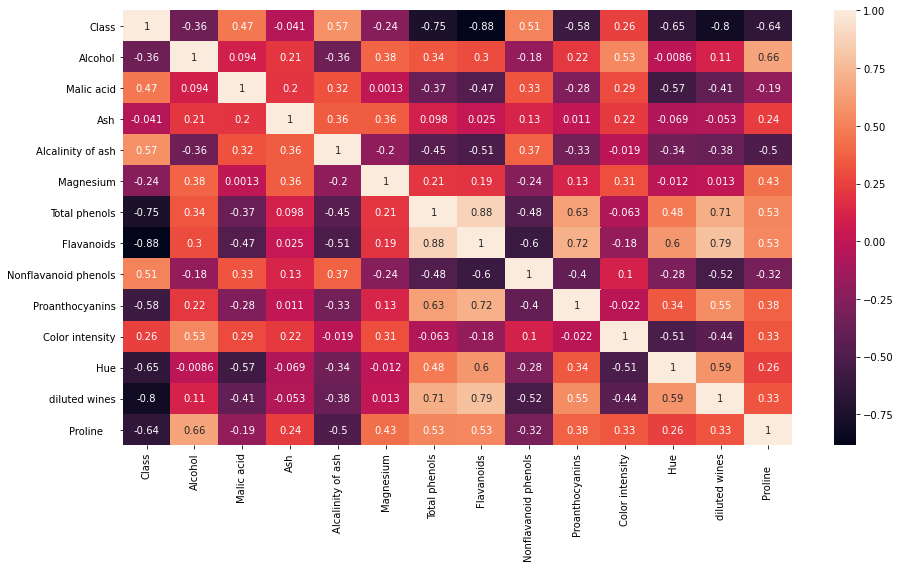

In [137]:
#Heatmap
plt.subplots(figsize=(15,8))
sns.heatmap(new_wine.corr(),annot=True)

Alcalinity of ash, Nonflavanoid phenols	 are highly positively correlated with class

In [138]:
dataFrame = pd.DataFrame(data=new_wine)
skewValue = dataFrame.skew(axis=1)
print(skewValue)

0      3.658677
1      3.688071
2      3.698499
3      3.706947
4      3.594531
         ...   
173    3.645221
174    3.633298
175    3.622485
176    3.623619
177    3.572587
Length: 168, dtype: float64


In [139]:
new_wine.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

Check the skewness

ValueError: num must be 1 <= num <= 8, not 9

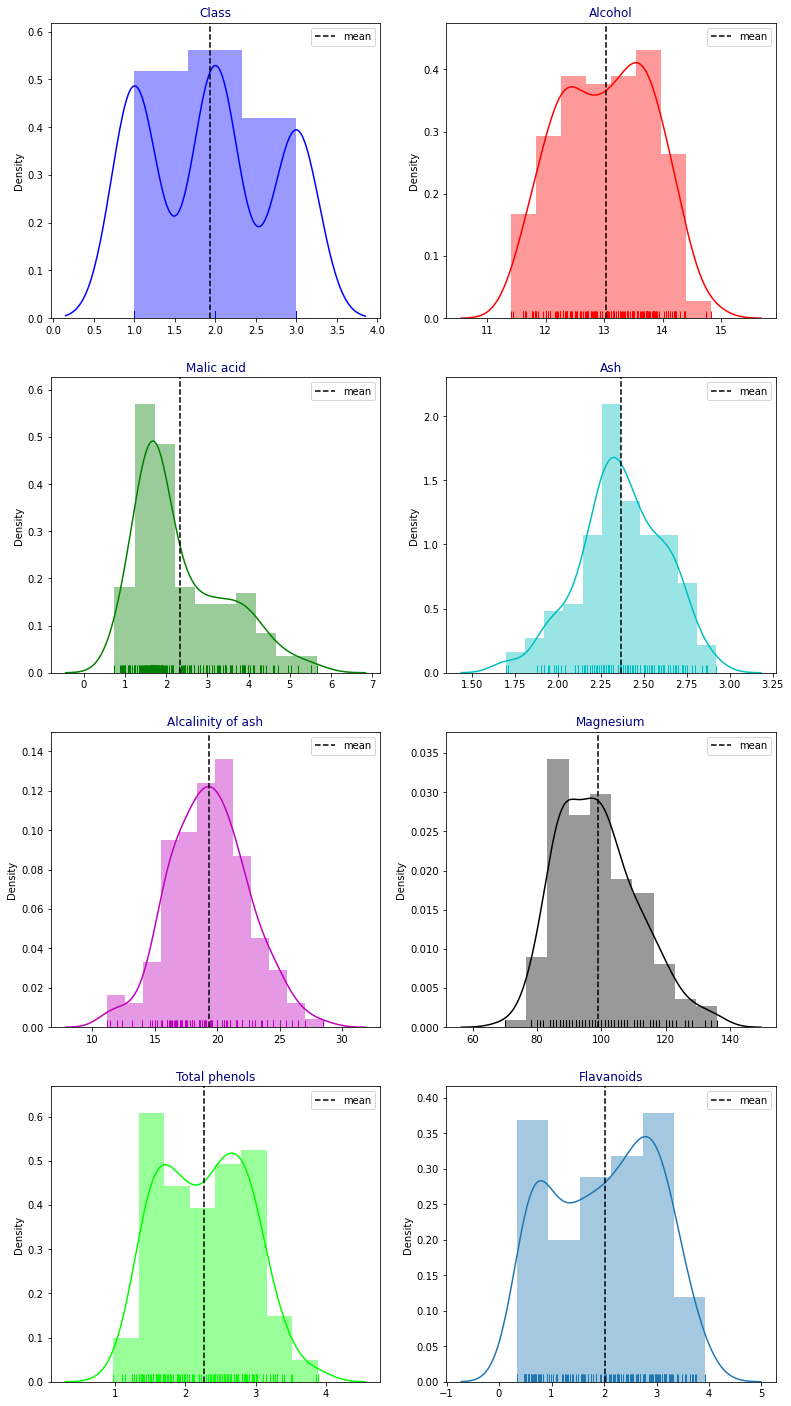

In [140]:
import itertools
cols=['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax=sns.distplot(new_wine[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(new_wine[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

Most of the values are not highl distributed

array([[<AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic acid'}>,
        <AxesSubplot:title={'center':'Ash'}>],
       [<AxesSubplot:title={'center':'Alcalinity of ash'}>,
        <AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>],
       [<AxesSubplot:title={'center':'Nonflavanoid phenols'}>,
        <AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>],
       [<AxesSubplot:title={'center':'diluted wines'}>,
        <AxesSubplot:title={'center':'Proline    '}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

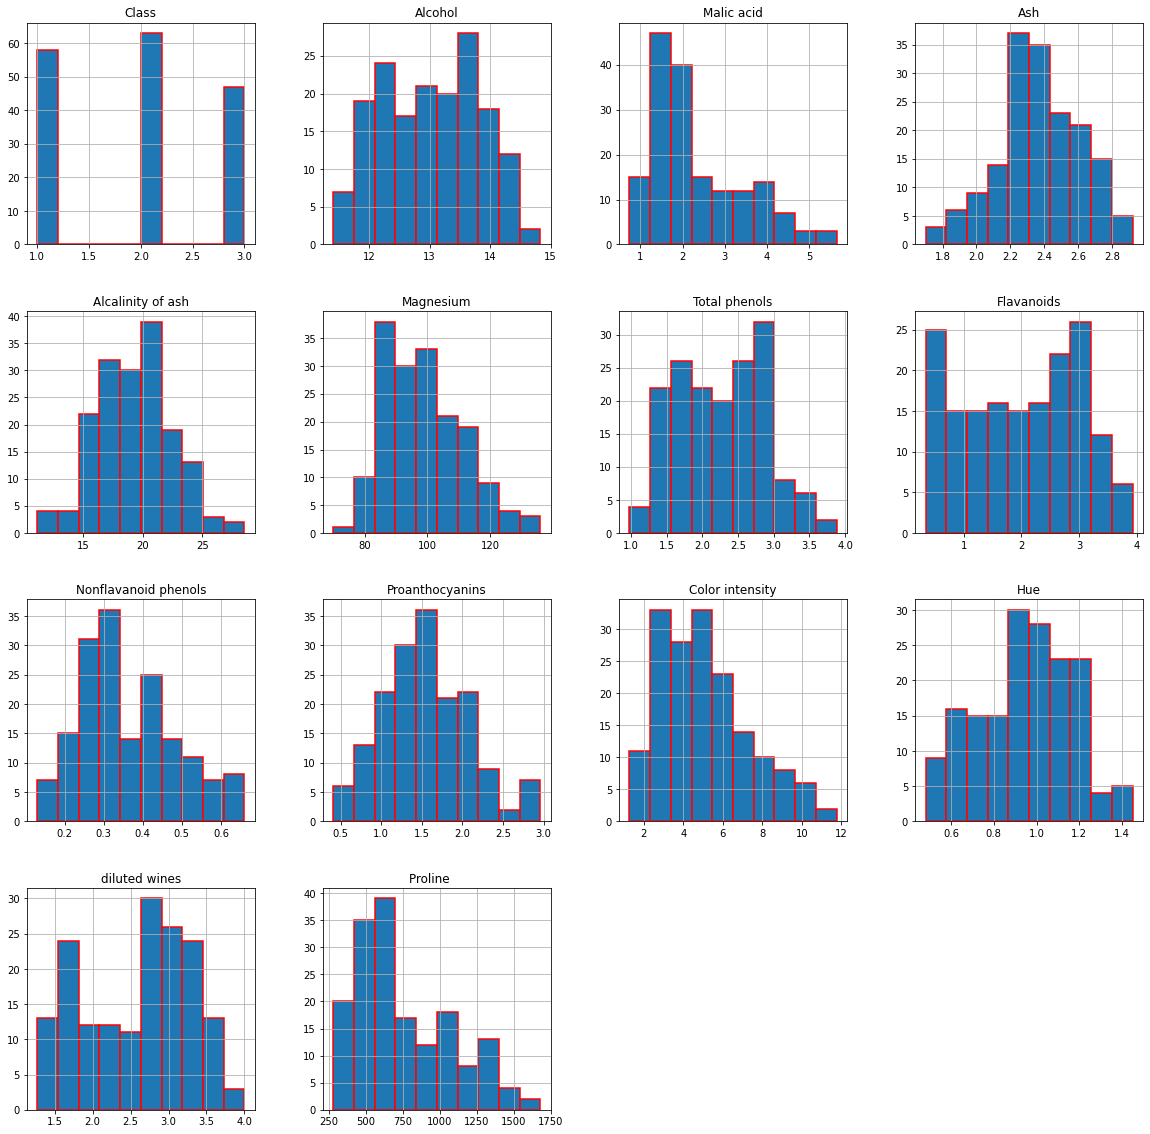

In [141]:
new_wine.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

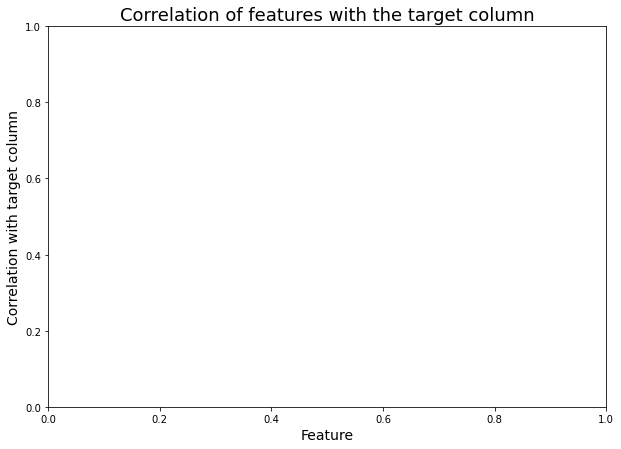

In [142]:
plt.figure(figsize=(10,7))
new_wine.corr()['Class'].sort_values(ascending=False).drop(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines'])
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Correlation with target column",fontsize=14)
plt.title("Correlation of features with the target column", fontsize=18)
plt.show()

# Removing Skewness

In [143]:
#Prepare the dataset for training the model
x=new_wine.drop('Class',axis=1)
y=new_wine['Class']

In [144]:
from sklearn.preprocessing import power_transform     #box-cox is only for positive but yeo-johnson is for both negative and positive
x=power_transform(x,method='yeo-johnson')

# Regression Model Building:

# Linear Regression

In [145]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [146]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training r2_score is :-",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is :-",r2_score(y_test,pred_test)*100)

At random state 880 The model performs very well
At random state :- 880
Training r2_score is :- 88.13062019340573
Testing r2_score is :- 88.12548666392664


We will use random state 880

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=880)

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Regularization

# 1. Lasso

In [149]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [150]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range (2,10):
    lsscore=cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross Validation Score is :- ", lsc*100)
    print("R2 score is :-", lss*100)
    print("\n")

At cv:- 2
Cross Validation Score is :-  -355.3542745876745
R2 score is :- 88.14757367804114


At cv:- 3
Cross Validation Score is :-  -568.8231254779333
R2 score is :- 88.14757367804114


At cv:- 4
Cross Validation Score is :-  -3.081051252105521
R2 score is :- 88.14757367804114


At cv:- 5
Cross Validation Score is :-  18.83275585183375
R2 score is :- 88.14757367804114


At cv:- 6
Cross Validation Score is :-  -8.452352988084337
R2 score is :- 88.14757367804114


At cv:- 7
Cross Validation Score is :-  -44.61853015331254
R2 score is :- 88.14757367804114


At cv:- 8
Cross Validation Score is :-  10.770799078401215
R2 score is :- 88.14757367804114


At cv:- 9
Cross Validation Score is :-  -12.427828754255499
R2 score is :- 88.14757367804114




Cv=2 will be accepted 

In [151]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [152]:
print("Error")
print("Mean Absolute Eror : ",mean_absolute_error(y_test,pred_ls))
print("Mean Squared Eror : ",mean_squared_error(y_test,pred_ls))
print("Root Mean Squared Eror : ",np.sqrt(mean_squared_error(y_test,pred_ls)))

Error
Mean Absolute Eror :  0.22403671809603629
Mean Squared Eror :  0.07515422572660758
Root Mean Squared Eror :  0.2741427105115283


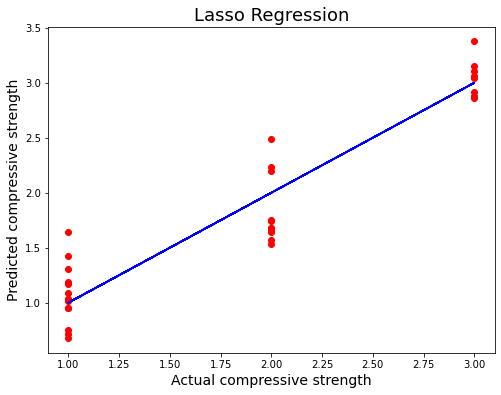

In [153]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual compressive strength",fontsize=14)
plt.ylabel("Predicted compressive strength",fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge Regression

In [154]:
from sklearn.linear_model import Ridge

parameters={'alpha':[.0001,.001,.01,.1,1,10],'copy_X':[True,False],'random_state':list(range(0,10)),'fit_intercept':[True,False],'normalize':[True,False],'tol':[.0001,.001,.01,.1,1,10]}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.0001}


In [155]:
rd=Ridge(alpha=0.01, copy_X= True, fit_intercept= True, normalize= True, random_state= 0, tol= 0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rds=r2_score(y_test,pred_rd)
print('R2 Score:',rds*100)

rdscore=cross_val_score(rd,x_t,y,cv=3)
rdc=rdscore.mean()
print('Cross Val Score : ',rdc*100)

R2 Score: 88.73430587431999
Cross Val Score :  -580.898935827949


In [156]:
print("Error")
print("Mean Absolute Eror : ",mean_absolute_error(y_test,pred_rd))
print("Mean Squared Eror : ",mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Eror : ",np.sqrt(mean_squared_error(y_test,pred_rd)))

Error
Mean Absolute Eror :  0.22008122859150805
Mean Squared Eror :  0.07143385635054891
Root Mean Squared Eror :  0.26727112891322347


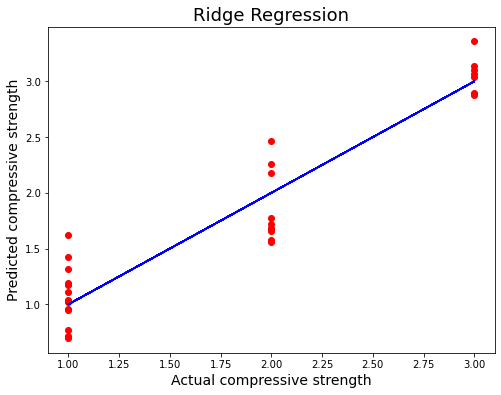

In [157]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual compressive strength",fontsize=14)
plt.ylabel("Predicted compressive strength",fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Classifier comparison

In [158]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,"is: ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

Accuracy score of LogisticRegression() is: 
1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

Accuracy score of GaussianNB() is: 
1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

Accuracy score of SVC() is: 
1.0
[[15  0  0]
 [ 0 11  0]
 [ 0  0  8]]
      

I have chosen LogisticRegression()

# Model Saving

In [159]:
import pickle
filename='wine_quality.pkl'
pickle.dump(ls,open(filename,'wb'))

# Classifier comparism

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

classifiers=[                                   #Create a pipeline called classifier
    KNeighborsClassifier(3),
    svm.SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
log_cols=["Classifier","Acuracy"]
log=pd.DataFrame(columns=log_cols)

In [111]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split

SSplit=StratifiedShuffleSplit(test_size=0.3,random_state=7)
acc_dict={}

for train_index,test_index in SSplit.split(x,y):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    for clf in classifiers:
        name=clf.__class__.__name__
        
        clf.fit(x_train,y_train)
        predict=clf.predict(x_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [112]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8,9]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)

ValueError: Length mismatch: Expected 0 rows, received array of length 10